#Muon Flux through a fix area
This code investigates the flux of muons passing through a constant circular area as a function of incidence angle. It also estimates the muon rate passing through that area. The area of the circle here is set to be the circular projection of an mDOM of the IceCube Upgrade.
To calculate the rate of muons passing through this area, we Riemann Integrate the flux over a defined range of momentum and angles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
!pip install daemonflux
import daemonflux
from daemonflux import Flux

In [2]:
# Constants
diameter = 35.6  # cm
area = np.pi * (diameter / 2) ** 2  # cm^2
pgrid = np.linspace(10,10000,1000) #array of p from 0.1 GeV to  10 000 GeV in 1000 steps
p_step = pgrid[1] - pgrid[0] #constant step size ensured by the difference of two consecutive elements of the grid
# Integration limits
costheta_min, costheta_max = 0, 1  # range of cos(theta) for the integration
num_costheta_steps = 100  # Number of steps for cos\theta integration

# Initialize daemonflux
daemonflux = Flux(location='generic')

Output()

Output()

In [3]:
# Flux function
def muon_flux(p, theta):
    return daemonflux.flux(p, (theta *180 / np.pi), 'muflux')  #flux of muons for variable theta and variable p in (p/(GeV/c))^3/ ((GeV/c) s sr cm^2)

In [4]:
# Area depending on muon angle
def effective_area(theta):
    return area * np.cos(theta) #cos multiplication is to show that when theta = 0 , the full area is used etc.

In [5]:

# Rate function with area dependence
def rate_function(p, theta):
    return (
        muon_flux(p, theta)
        / (p**3)  # Momentum normalization
        * effective_area(theta)  # Angular-dependent area
        * np.sin(theta)  # comes from solid angle dOmega if phi is symmetric
    )

In [9]:
# Muon rate by using Riemann sum over theta and p

costheta_values = np.linspace(costheta_min, costheta_max, num_costheta_steps)
costheta_step = (costheta_max - costheta_min) / num_costheta_steps
muon_rate = 0

for costheta in costheta_values:
    theta = np.arccos(costheta)  # Convert back to angle
    # Compute the p-integral for the current theta
    # Apply rate_function to the entire `pgrid` array
    p_integrand = rate_function(pgrid, theta)

    # Integrate over momentum using a constant step size.
    p_integral = np.sum(p_integrand * p_step) #np.sum sums together all the elements in an array. Here the p_integrand array is multiplied by p_step and then each element is summed

    # Add the theta contribution integrated over cos(theta)
    muon_rate += p_integral * costheta_step

# Multiply by phi symmetry factor
muon_rate *= 2 * np.pi



# Print results
print("The muon rate is:", muon_rate, "1/s")

The muon rate is: 225.7983347307456 1/s


Text(0.5, 1.0, 'Muon Flux as a function of momentum for varying zenith angles')

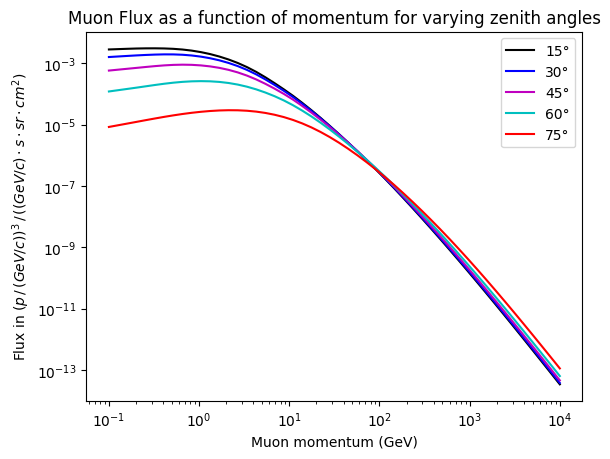

In [11]:
#Initialize daemonflux
daemonflux = Flux(location='generic')
pgrid = np.logspace(-1,4) #defining the momentum range as 10^-1 to 10^4 GeV

plt.figure()
plt.loglog(pgrid, daemonflux.flux(pgrid,'15', 'muflux')/(pgrid**3), color="k", label = '15°') #plotting a log graph in both x and y for a muon flux with zenith angle 15°
plt.loglog(pgrid, daemonflux.flux(pgrid,'30', 'muflux')/(pgrid**3), color="b", label = '30°') #plotting a log graph in both x and y for a muon flux with zenith angle 30°
plt.loglog(pgrid, daemonflux.flux(pgrid,'45', 'muflux')/(pgrid**3), color="m", label = '45°') #plotting a log graph in both x and y for a muon flux with zenith angle 45°
plt.loglog(pgrid, daemonflux.flux(pgrid,'60', 'muflux')/(pgrid**3), color="c", label = '60°') #plotting a log graph in both x and y for a muon flux with zenith angle 60°
plt.loglog(pgrid, daemonflux.flux(pgrid,'75', 'muflux')/(pgrid**3), color="r", label = '75°') #plotting a log graph in both x and y for a muon flux with zenith angle 75°
plt.xlabel("Muon momentum (GeV)")
plt.ylabel(r"Flux in $(p\,/\,(GeV/c))^3\,/\,((GeV/c)\cdot s \cdot sr \cdot cm^2)$")
plt.legend()
plt.title("Muon Flux as a function of momentum for varying zenith angles")

Text(0.5, 1.0, 'Muon Flux as a function of momentum for chosen example angle 30°')

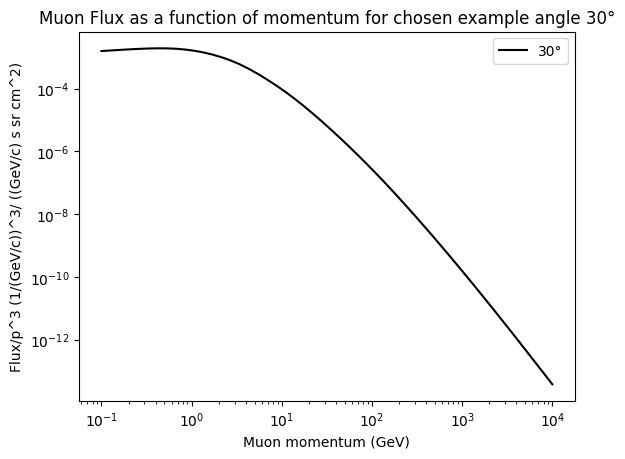

In [12]:
#Plot of the flux for one chosen angle
daemonflux = Flux(location='generic')
pgrid = np.logspace(-1,4) #defining the momentum range as 10^-1 to 10^4 GeV

plt.figure() #making an initial figure
plt.loglog(pgrid, daemonflux.flux(pgrid,'30', 'muflux')/(pgrid**3), color="k", label = '30°') #plotting a log graph in both x and y for a muon flux with zenith angle 30°
plt.xlabel("Muon momentum (GeV)")
plt.ylabel("Flux/p^3 (1/(GeV/c))^3/ ((GeV/c) s sr cm^2)")
plt.legend()
plt.title("Muon Flux as a function of momentum for chosen example angle 30°")